In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [10]:
X = df.drop('Drug', axis=1)
y = df['Drug']

le = LabelEncoder()

X = X.apply(LabelEncoder().fit_transform)
y = le.fit_transform(y)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

df_train = pd.DataFrame(X_train,index=X_train[:,0])

In [13]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

In [14]:
from sklearn.metrics import classification_report

print("Relatório de classificação: \n", classification_report(y_test, y_pred))  

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        26
           1       1.00      1.00      1.00         7
           2       0.60      1.00      0.75         3
           3       1.00      0.17      0.29         6
           4       0.94      0.94      0.94        18

    accuracy                           0.88        60
   macro avg       0.88      0.81      0.78        60
weighted avg       0.90      0.88      0.86        60



In [15]:
from tqdm import tqdm
error = []

for i in tqdm(range(1, 20, 2)):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

100%|██████████| 10/10 [00:00<00:00, 121.61it/s]


Text(0, 0.5, 'Mean Error')

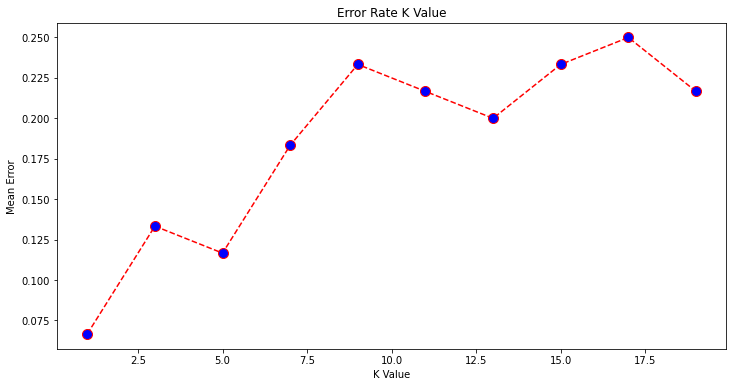

In [16]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20,2), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [17]:
classifier = KNeighborsClassifier(n_neighbors=1)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=1)

In [18]:
y_pred = classifier.predict(X_test) 

In [19]:
print("Relatório de classificação: \n", classification_report(y_test, y_pred))  

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       1.00      0.71      0.83         7
           2       0.50      1.00      0.67         3
           3       1.00      1.00      1.00         6
           4       1.00      0.94      0.97        18

    accuracy                           0.93        60
   macro avg       0.89      0.92      0.89        60
weighted avg       0.96      0.93      0.94        60

